# Homework 5: This or Physics Hack Day

Physics 177, Spring 2017 (Prof. Tanedo)  
Due: Tuesday, May 16  

*Nicholas Pham*

**Important**: This homework is optional **if** you participate in Physics Hack Day:  
http://theory.ucr.edu/PhysicsHackDay/

If you do so, please delete all of the cells below and replace it with a link to the Physics Hack Day GitHub repository to which you contributed. 


## Problem 1: Double Pendulum

In this problem, you will extend the simple pendulum in <a href="https://github.com/Physics177-2017/Homework04">Homework 4</a> to a <a href="https://en.wikipedia.org/wiki/Double_pendulum">double pendulum</a>.

<img src="hw5pendulum.png">  
Image from <a href="https://commons.wikimedia.org/wiki/File:Double-Pendulum.svg">Wikimedia Commons</a>

Assume no forces other than gravity. Do not assume the small angle approximation. 

Plot the trajectory of the double pendulum for a few different initial conditions. Your goal is to reproduce the cool-looking trajectories in the  <a href="https://en.wikipedia.org/wiki/Double_pendulum">Wikipedia article</a>, for example:

<img src="hw5_doublepic.jpg">

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos as cos
from math import sin as sin
from math import pi as pi

#CONSTANTS
g = 9.8

#PARAMETER
ell1 = 1.0    #Length of first rod
ell2 = 1.0    #Length of second rod

theta01 = pi/2  #Initial Theta1
theta02 = pi    #Initial Theta2

omega_w1 = 0.0 #angular velocity of first bob
omega_w2 = 0.0 #angular velocity of second bob

dt = 0.001      #step size in time
t_final = 10.0 #total # of seconds to run

#First Order ODE initialization

def f1 (theta1, theta2, omega1, omega2, t):
    """Function to find d(theta1)/d(t)"""
    return omega1

def h1(theta1, theta2, omega1, omega2, t):
    """Function to find d(omega1)/d(t)"""
    part1 = 1*(omega1**2)*sin(2*theta1 - 2*theta2)
    part2 = 2*(omega2**2)*sin(theta1 - theta2)
    part3 = (g/ell1)*(sin(theta1 - 2*theta2)+3*sin(theta1))
    part4 = 3 - cos(2*theta1 - 2*theta2)
    return (-1*(part1 + part2 + part3)/part4)

def f2(theta1, theta2, omega1, omega2, t):
    """Function to find d(theta2)/dt"""
    return omega2

def h2 (theta1, theta2, omega1, omega2, t):
    """Function to find d(omega2)/d(t)"""
    part1 = 4*(omega1**2)*sin(1*theta1 - 1*theta2)
    part2 = 1*(omega2**2)*sin(2*theta1 - 2*theta2)
    part3 = 2*(g/ell1)*(sin(2*theta1 - 1*theta2)-sin(theta2))
    part4 = 3 - cos(2*theta1 - 2*theta2)
    return (part1 + part2 + part3)/part4

#Time slices. Let's make em'!

tpoints = np.arange(0, t_final, dt)

#Function to calculate successive angles and times

def time_and_angles():
    """
    Returns 5 numpy arrays
    1. A list of time samples
    2. A list of theta1 values
    3. A list of theta2 values
    4. A list of omega1 values
    5. A list of omega2 values
    """
    
    #Initialize the arrays
    
    theta_one = []
    theta_two = []
    omega_one = []
    omega_two = []
    
    #Initialize the values
    theta1 = theta01
    theta2 = theta02
    omega1 = omega_w1
    omega2 = omega_w2
    
    for t in tpoints:
        #Record omega, theta
        theta_one.append(theta1)
        theta_two.append(theta2)
        omega_one.append(omega1)
        omega_two.append(omega2)
        
        #Time jumps with Runge-Kutta method
        ####Theta_1
        k1 = dt*f1(theta_one[-1], theta_two[-1], omega_one[-1], omega_two[-1], t)
        k2 = dt*f1(theta_one[-1] + 0.5*k1, theta_two[-1], omega_one[-1], omega_two[-1], t)
        theta1 += k2
        
        ####Theta_2
        k1 = dt*f2(theta_one[-1], theta_two[-1], omega_one[-1], omega_two[-1], t)
        k2 = dt*f2(theta_one[-1], theta_two[-1] + 0.5*k1, omega_one[-1], omega_two[-1], t)
        theta2 += k2
        
        ####Omega_1
        k1 = dt*h1(theta_one[-1], theta_two[-1], omega_one[-1], omega_two[-1], t)
        k2 = dt*h1(theta_one[-1], theta_two[-1], omega_one[-1] + 0.5*k1, omega_two[-1], t)
        omega1 += k2
        
        ####Omega_2
        k1 = dt*h2(theta_one[-1], theta_two[-1], omega_one[-1], omega_two[-1], t)
        k2 = dt*h2(theta_one[-1], theta_two[-1], omega_one[-1], omega_two[-1] + 0.5*k1, t)
        omega2 += k2
    
    tt = np.array(tpoints)
    thetas01 = np.array(theta_one)
    thetas02 = np.array(theta_two)
    omegas01 = np.array(omega_one)
    omegas02 = np.array(omega_two)
    
    return tt, thetas01, thetas02, omegas01, omegas02


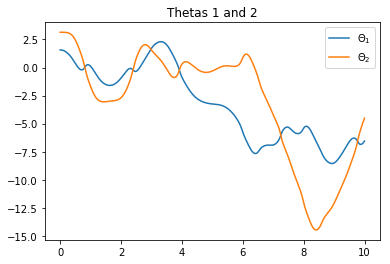

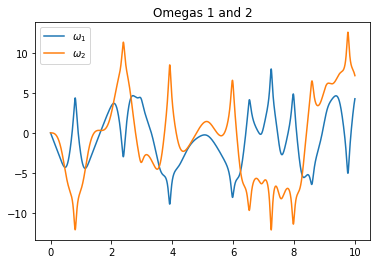

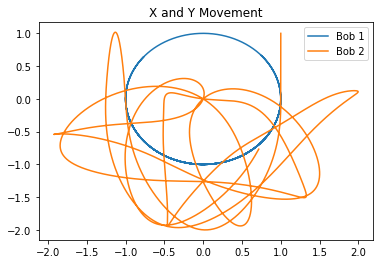

In [40]:
####Testing and plotting
t, theta1,theta2,omega1, omega2 = time_and_angles()

plt.figure(1)
plt.title('Thetas 1 and 2')
plt.plot(t, theta1, label = '$\Theta_1$')
plt.plot(t, theta2, label = '$\Theta_2$')
plt.legend()

plt.figure(2)
plt.title('Omegas 1 and 2')
plt.plot(t, omega1, label = '$\omega_1$')
plt.plot(t, omega2, label = '$\omega_2$')
plt.legend()
plt.show()

Cos = np.vectorize(cos)
Sin = np.vectorize(sin)

x1 = ell1*Sin(theta1)
y1 = -1*ell2*Cos(theta1)

x2 = ell1*Sin(theta1) + ell2*Sin(theta2)
y2 = -1*(ell1*Cos(theta1) + ell2*Cos(theta2))

plt.figure(3)
plt.title('X and Y Movement')
plt.plot(x1,y1, label = 'Bob 1')
plt.plot(x2,y2, label = 'Bob 2')
plt.legend()
plt.show()

## Problem 1, extra credit:

I think the double pendulum trajectories are really neat. They're a very simple system with surprisingly complex behavior. (Maybe it's just surprising to me?) For extra credit (or for inspiration for Physics Hack Day), consider some of the following:

* Make an animation of the double pendulum trajectory. You can simultaneously animate the trajectories of both weights, see <a href="https://en.wikipedia.org/wiki/Double_pendulum#/media/File:Trajektorie_eines_Doppelpendels.gif">this  example</a>. 
* In your animation above, can you also do the "gradual fading" of the older trajectory points that is demonstrated in the example?
* Here's something really cool: can you **sonify** the trajectory? Map the *velocity* of the mass to a pitch and then play the pitch as the pendulum moves. In this way, you model the *Doppler shift* of a buzzer attached to the double pendulum. You can find an example of the implementation of the `scipy` sound library <a href="https://losc.ligo.org/s/events/GW150914/GW150914_tutorial.html">here</a>... which is itself a fantastic example of a Jupyter notebook in Nobel-prize-worthy research.
* Triple pendulum?! (If you need inspiration: https://www.youtube.com/watch?v=OQSNhk5ICTI)

## Problem 2: Poisson Equation

The Poisson equation in two dimension is:

$$\displaystyle \partial_x^2 \phi(x,y) + \partial_y^2 \phi(x,y) = -\rho(x,y)$$

We have picked units where $\varepsilon_0 = 1$ and $\rho$ is the charge density.

This is similar to the <a href="https://github.com/Physics177-2017/Lec11-PDE/blob/master/Lecture%2011%20Preview.ipynb">Lecture 11</a> demo, except that now there are source charges. 

Numerically solve the Poisson equation following two dimensional system (Newman Example 9.2):

<img src="HW5_NewmanFig9.4.png">

This is a 2D with size 100 cm by 100 cm. There are smaller 20 cm by 20 cm squares. The one on the upper right has charge density $\rho = +1/\text{cm}^2$ and the one on the lower left has charge density $\rho = -1/\text{cm}^2$. The boundaries of the large square are set to zero potential. 

Solve for the potential, $\phi$, everywhere in the large square. Plot the potential. I leave it to you to pick a discretization (step size) that is sufficiently fast while also demonstrating the correct behavior. 

Hint: before you do anything, you should guess what the expected result should be.

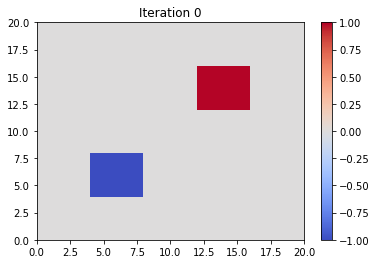

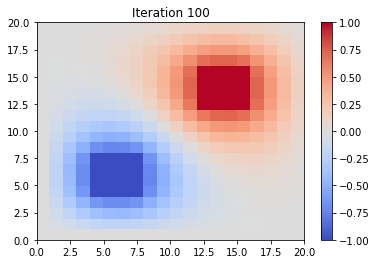

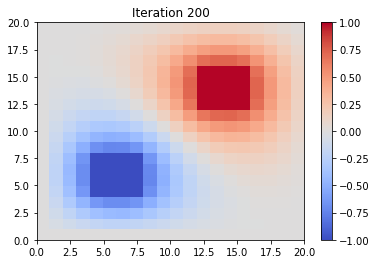

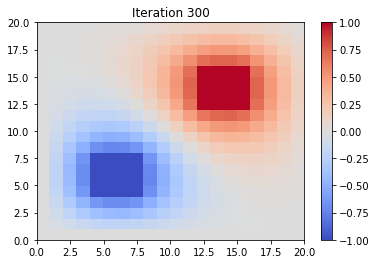

In [97]:
#Using average values to solve Poisson's Equation
import numpy as np

#PARAMETERS
M = 20

#INTRODUCE TARGET
target = 1e-07
trial = 0

#ARRAYS
delta = 1.0
phi = np.zeros([M+1,M+1], float) # Making our initial conditions
phi[4:8,4:8] = -1 # 4 to 8 (not including 8)
phi[12:16,12:16] = 1 #12 to 16 (not including 16)
phi_prime = np.zeros([M+1,M+1], float)

import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi,cmap = plt.cm.get_cmap('coolwarm'))
plt.title('Iteration ' + str(trial))
plt.colorbar()
plt.show()

#Update Trial Number
trial = 1

while delta>target:
    
    #Continuously update potential
    for i in range(M+1):
        for j in range(M+1):
            #CHECKING BOUNDARY CONDITIONS
            if i==0 or i==M or j==0 or j==M:
                phi_prime[i,j] = phi[i,j]
            elif ((i>=4 and i<=7) and (j>=4 and j<=7)) or ((i>=12 and i<=15) and (j>=12 and j<=15)): 
                phi_prime[i,j] = phi[i,j]
            else:
                phi_prime[i,j] = (phi[i+1,j] + phi[i-1,j] + phi[i,j+1] + phi[i,j-1])/4
                
    ##Just checking if delta is now small enough (Update it~~~)
    delta = np.max(np.abs(phi-phi_prime))
    
    ##Let's swap arrays to update the potential
    phi, phi_prime = phi_prime, phi
    
    ##Print out only selected plots
    
    if (trial%100==0):
        xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
        plt.pcolormesh(xx,yy,phi,cmap = plt.cm.get_cmap('coolwarm'))
        plt.title('Iteration ' + str(trial))
        plt.colorbar()
        plt.show()
    trial+=1
    

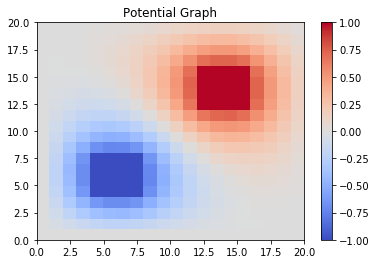

In [96]:
###TESTING
import matplotlib.pyplot as plt

xx, yy = np.meshgrid(np.arange(M+1),np.arange(M+1))
plt.pcolormesh(xx,yy,phi, cmap =plt.cm.get_cmap('coolwarm'))
plt.title('Potential Graph')
plt.colorbar()
plt.show()